In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [9]:
import networkx as nx
G = nx.DiGraph()
G.clear()


In [18]:
credentials = json.load(open('Auth.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists['uri']
like = playlists['like']

client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
# username = uri.split(':')[2]
# playlist_id = uri.split(':')[4]
username = '118419143'
playlist_id = '1A5TpVm7uJy9REzIhBLTWG'
results = sp.user_playlist(username, playlist_id, 'tracks')
# results = sp.playlist_tracks(playlist_id, 'tracks')
playlist_tracks_data = results['tracks']
# print(playlist_tracks_data)
# playlist_tracks_id = []
# playlist_tracks_titles = []
# playlist_tracks_artists = []
# playlist_tracks_first_artists = []

header = ['id', 'title', 'first_artist', 'all_artists',
          'danceability', 'energy', 'key', 'loudness',
          'mode', 'acousticness', 'instrumentalness',
          'liveness', 'valence', 'tempo',
          'duration_ms', 'time_signature']


with open('songs.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data

    for track in playlist_tracks_data['items']:
        # playlist_tracks_id.append(track['track']['id'])
        # playlist_tracks_titles.append(track['track']['name'])
        artist_list = []
        for artist in track['track']['artists']:
            artist_list.append(artist['name'])
        # playlist_tracks_artists.append(artist_list)
        # playlist_tracks_first_artists.append(artist_list[0])
        # features = sp.audio_features(track['track']['id'])
        # print(features)
        data = [track['track']['id'], track['track']
                ['name'], artist_list[0], artist_list]
        # data = [track['track']['id'], track['track']['name'], artist_list[0], artist_list, features['danceability'],
        #         features['energy'], features['key'], features['loudness'], features['mode'], features['acousticness'], features['instrumentalness'], features['liveness'], features['valence'], features['tempo'], features['duration_ms'], features['time_signature']]
        writer.writerow(data)


In [31]:
def check_artist(artist):

    filename = 'songs.csv'
    df = pd.read_csv(filename)
    songs = []
    for index, row in df.iterrows():
        if artist == row[2]:
            songs.append(row[1])
        else:
            for artists in row[3]:
                if artist == artists:
                    songs.append(row[1])
    return songs


In [35]:

filename = 'songs.csv'
df = pd.read_csv(filename)

for index, row in df.iterrows():
    G.add_node(row[1])
    songs = check_artist(row[2])
    for song in songs:
        if song != row[1]:
            G.add_edge(row[1], song)
            # nx.set_node_attributes(G, {i : {'comic' : 'marvel'}} )


In [36]:
print('Nr of nodes:' + str(G.number_of_nodes()))
print('Nr of edges:' + str(G.number_of_edges()))
print('Nr of edges:' + str(G.size()))


Nr of nodes:100
Nr of edges:122
Nr of edges:122


In [37]:
from fa2 import ForceAtlas2


In [40]:
d = dict(G.degree)


100%|██████████| 20/20 [00:00<00:00, 596.86it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


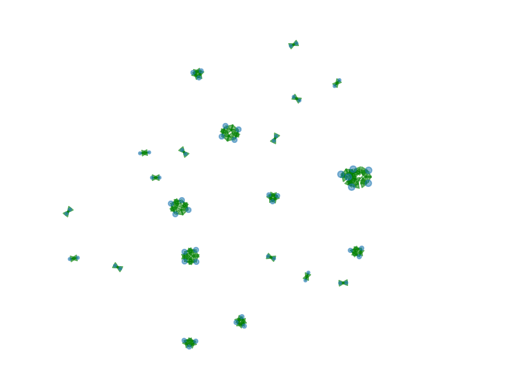

In [42]:
import matplotlib.pyplot as plt


forceatlas2 = ForceAtlas2()

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=20)
# nx.draw(G1, node_color=color_map, pos=positions, )
nx.draw_networkx_nodes(G, positions, node_size=[
                       v * 2 for v in d.values()], alpha=0.5)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.5)
plt.axis('off')
plt.show()
